In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from bearing_walls import *
import random
from colored_space import *
from external_wall_contours import *
from colored_space import *
from textual_layer import *

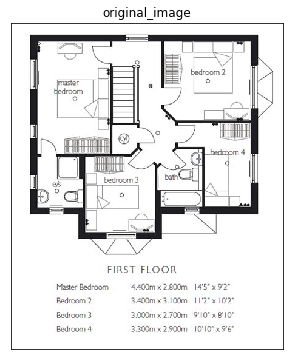

In [2]:
#read the image
img_path = "../Data/floorplans_VOA/DFirstFloor.jpg"
original_image = cv2.imread(img_path)

plt.figure(figsize = (60,6))
plt.imshow(original_image, cmap='gray')
plt.title('original_image')
plt.xticks([]), plt.yticks([])
plt.show()

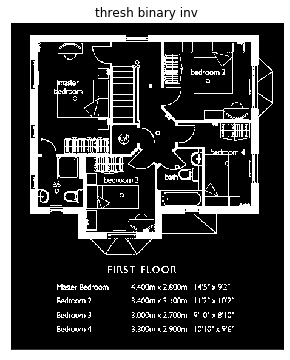

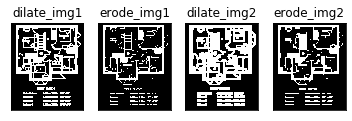

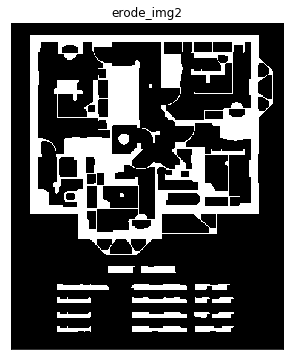

In [3]:
img_copy = original_image.copy()
original_img_gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

_, thresh = cv2.threshold(original_img_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize = (60,6))
plt.imshow(thresh, cmap='gray')
plt.title('thresh binary inv')
plt.xticks([]), plt.yticks([])
plt.show()

kernel1 = np.ones((5, 5), np.uint8)  # square image kernel used for erosion
dilate_img1 = cv2.dilate(thresh, kernel1, iterations=1)
erode_img1 = cv2.erode(dilate_img1, kernel1, iterations=1)
kernel2 = np.ones((5, 5), np.uint8)
dilate_img2 = cv2.dilate(erode_img1, kernel2, iterations=2)
erode_img2 = cv2.erode(dilate_img2, kernel2, iterations=2)

titles = ['dilate_img1','erode_img1','dilate_img2', 'erode_img2']
images = [dilate_img1, erode_img1, dilate_img2, erode_img2]

for i in range(4):
    plt.subplot(1,4,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize = (60,6))
plt.imshow(erode_img2, cmap='gray')
plt.title('erode_img2')
plt.xticks([]), plt.yticks([])
plt.show()


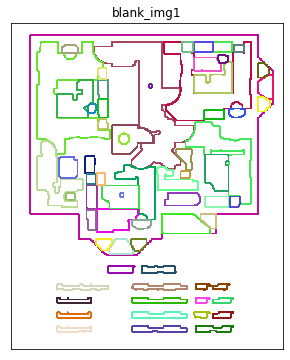

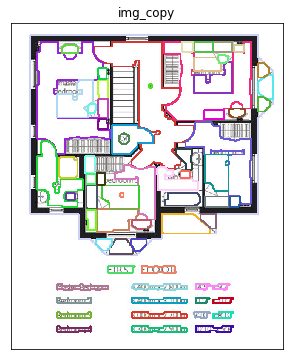

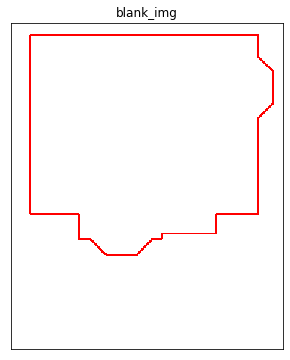

In [4]:
a,b,c = original_image.shape
blank_img = np.zeros([a, b, c], np.uint8)
blank_img1 = np.zeros([a, b, c], np.uint8)
blank_img.fill(255)
blank_img1.fill(255)

contours, hierachy = cv2.findContours(erode_img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# sort out the contours
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for c in sorted_contours:
    cv2.drawContours(img_copy, [c], -1,
                     (random.randrange(0, 255), random.randrange(0, 256), random.randrange(0, 255))
                     , 2)

for c in sorted_contours:
    cv2.drawContours(blank_img1, [c], -1,
                     (random.randrange(0, 255), random.randrange(0, 256), random.randrange(0, 255))
                     , 2)

cv2.drawContours(blank_img, [sorted_contours[0]], -1, (255, 0, 0), 2)


plt.figure(figsize = (60,6))
plt.imshow(blank_img1, cmap='gray')
plt.title('blank_img1')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize = (60,6))
plt.imshow(img_copy, cmap='gray')
plt.title('img_copy')
plt.xticks([]), plt.yticks([])
plt.show()


plt.figure(figsize = (60,6))
plt.imshow(blank_img, cmap='gray')
plt.title('blank_img')
plt.xticks([]), plt.yticks([])
plt.show()


In [5]:
# Area Calcuation:
area_in_px_sq = cv2.contourArea(sorted_contours[0])

area_in_cm_sq = area_in_px_sq * 0.0007000434
area_in_ft_sq = area_in_cm_sq * 0.0010763

# display area
print("\nArea in pixel-square:")
print(area_in_px_sq)

print("\nArea in cm square")
print(area_in_cm_sq)



Area in pixel-square:
123225.5

Area in cm square
86.2631979867
